In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import neuron

# Analyse hyper-activity

In [5]:
# Create a dataframe from a base directory

base_directory = '/Volumes/LaCie/LaCie/Gcampf6/ANALYSED/'

gaers = pd.DataFrame()
wistar = pd.DataFrame()

for dirpath, dirnames, filenames in os.walk(base_directory):
    for filename in [f for f in filenames if f.endswith(".csv")]:
        file_path = os.path.join(dirpath, filename)
        df = pd.read_csv(file_path)
        df['experiment'] = filename.split('.')[0]
        if 'gaers' in filename.lower():
            gaers = gaers.append(df)
        elif 'wistar' in filename.lower():
            wistar = wistar.append(df)
        else:
            print(filename)

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
# I have saved the results as one .csv file

# gaers.to_csv('/Users/thomasvuillaume/Work/Dev/neuronDetector/results/gaers20180813.csv')
# wistar.to_csv('/Users/thomasvuillaume/Work/Dev/neuronDetector/results/wistar20180813.csv')

gaers = pd.read_csv('../results/gaers20180813.csv')
wistar = pd.read_csv('../results/wistar20180813.csv')

In [6]:
gaers.describe()

,Unnamed: 0,Volume (pixel^3),Surface (pixel^2),Nb of obj. voxels,Nb of surf. voxels,IntDen,Mean,StdDev,Median,Min,...,Median dist. to surf. (pixel),XM,YM,ZM,BX,BY,BZ,B-width,B-height,B-depth
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,1.696900e+04,16969.0,16969.0,16969.0,16969.0,...,16969.00000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,92.994048,2128.008545,1922.332017,2128.008545,1061.916200,5.426422e+05,255.0,0.0,255.0,255.0,...,10.38038,466.691250,586.775574,127.978078,452.868054,572.601685,121.027167,28.992751,29.221463,16.903766
std,70.673933,2017.150892,1412.529552,2017.150892,792.067242,5.143735e+05,0.0,0.0,0.0,0.0,...,5.42086,287.366077,278.515702,88.311634,287.077067,279.338715,90.766609,21.894299,22.331666,22.653726
min,0.000000,400.000000,400.000000,400.000000,191.000000,1.020000e+05,255.0,0.0,255.0,255.0,...,4.16800,0.492000,0.877000,1.125000,0.000000,0.000000,1.000000,3.000000,3.000000,1.000000
25%,39.000000,710.000000,966.000000,710.000000,504.000000,1.810500e+05,255.0,0.0,255.0,255.0,...,7.14000,216.847000,354.618000,45.434000,203.000000,339.000000,39.000000,17.000000,17.000000,5.000000
50%,80.000000,1328.000000,1460.000000,1328.000000,808.000000,3.386400e+05,255.0,0.0,255.0,255.0,...,8.95600,453.210000,603.965000,121.256000,438.000000,590.000000,117.000000,24.000000,24.000000,9.000000
75%,130.000000,2791.000000,2384.000000,2791.000000,1348.000000,7.117050e+05,255.0,0.0,255.0,255.0,...,11.72900,705.849000,825.937000,202.572000,691.000000,814.000000,197.000000,34.000000,35.000000,16.000000
max,434.000000,9998.000000,13106.000000,9998.000000,7126.000000,2.549490e+06,255.0,0.0,255.0,255.0,...,76.76000,1022.538000,1022.505000,294.998000,1021.000000,1021.000000,295.000000,334.000000,397.000000,295.000000


In [12]:
gaers_stats = neuron.print_stats(gaers)

105 different experiments
16969 detected neurons in total
161.61 neurons per experiment on average

DIV10:
21 experiments
3836 neurons
182.67 neurons per exp

DIV14:
23 experiments
3938 neurons
171.22 neurons per exp

DIV18:
6 experiments
1049 neurons
174.83 neurons per exp

DIV21:
18 experiments
2225 neurons
123.61 neurons per exp

DIV4:
22 experiments
3993 neurons
181.50 neurons per exp

DIV7:
15 experiments
1928 neurons
128.53 neurons per exp



,nb_exp,nb_neur,nb_neur/nb_exp
DIV10,21.0,3836.0,182.666667
DIV14,23.0,3938.0,171.217391
DIV18,6.0,1049.0,174.833333
DIV21,18.0,2225.0,123.611111
DIV4,22.0,3993.0,181.500000
DIV7,15.0,1928.0,128.533333


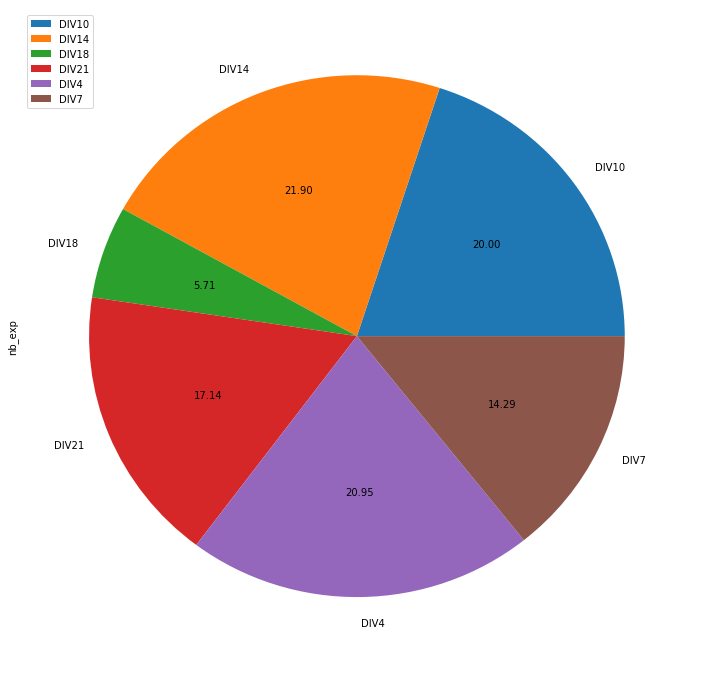

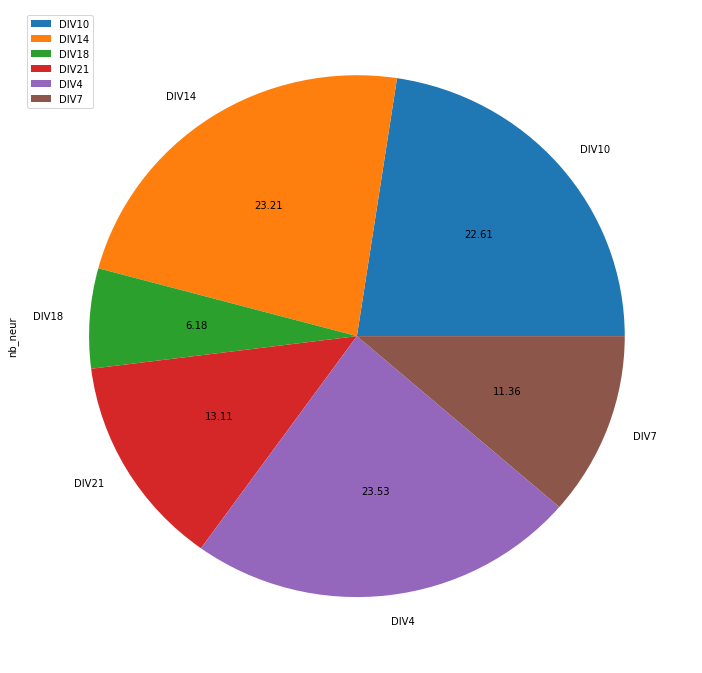

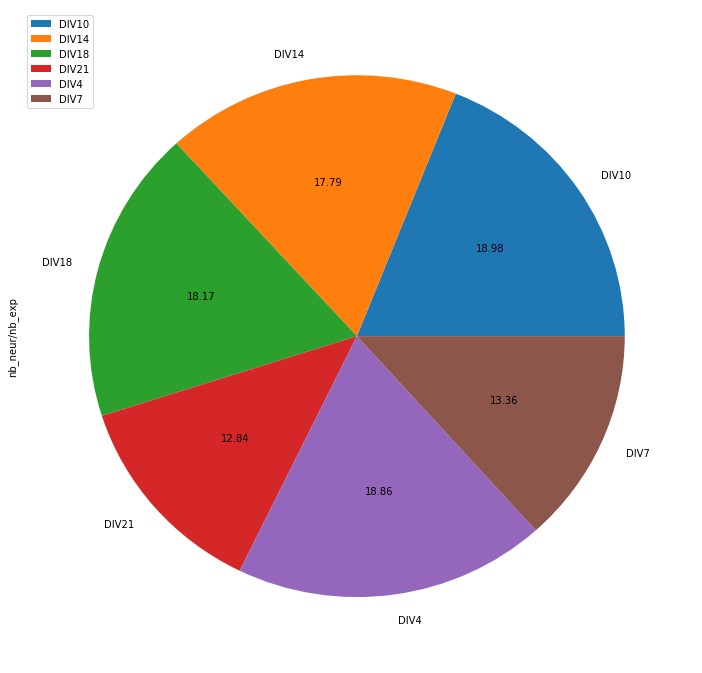

In [13]:
# Summary :
display(gaers_stats)

display(gaers_stats.plot.pie(y='nb_exp', figsize=(12,12), autopct='%.2f'));
display(gaers_stats.plot.pie(y='nb_neur', figsize=(12,12), autopct='%.2f'));
display(gaers_stats.plot.pie(y='nb_neur/nb_exp', figsize=(12,12), autopct='%.2f'));

In [14]:
wistar_stats = neuron.print_stats(wistar)

99 different experiments
19688 detected neurons in total
198.87 neurons per experiment on average

DIV10:
27 experiments
4835 neurons
179.07 neurons per exp

DIV14:
18 experiments
2961 neurons
164.50 neurons per exp

DIV4:
4 experiments
906 neurons
226.50 neurons per exp

DIV7:
19 experiments
6362 neurons
334.84 neurons per exp

Div18:
31 experiments
4624 neurons
149.16 neurons per exp



,nb_exp,nb_neur,nb_neur/nb_exp
DIV10,27.0,4835.0,179.074074
DIV14,18.0,2961.0,164.500000
DIV4,4.0,906.0,226.500000
DIV7,19.0,6362.0,334.842105
Div18,31.0,4624.0,149.161290


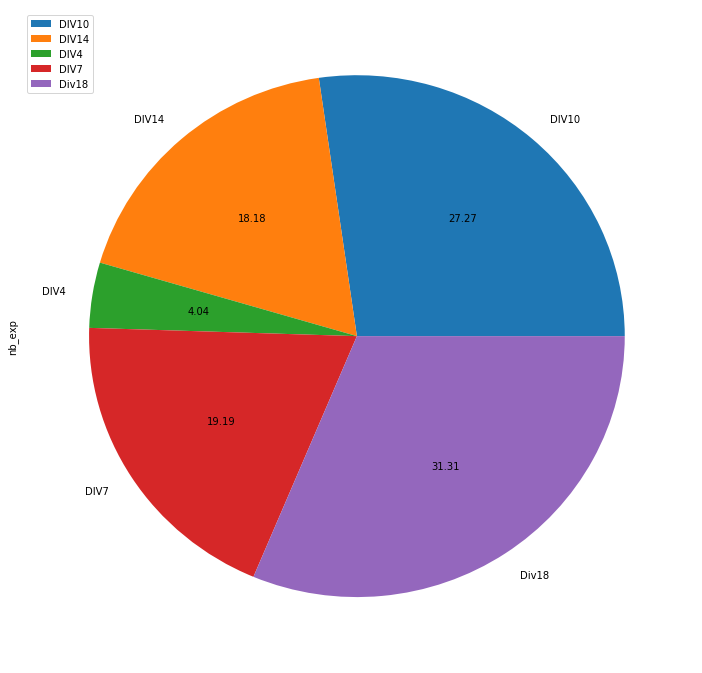

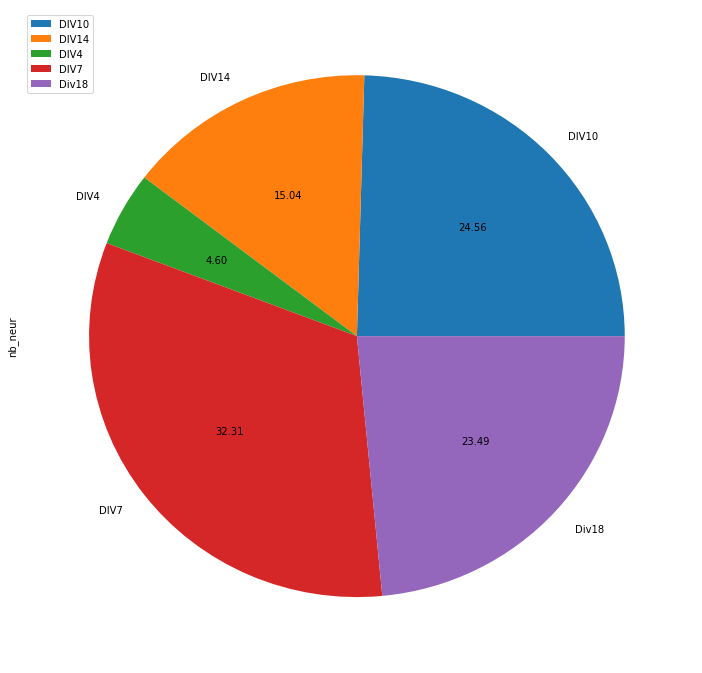

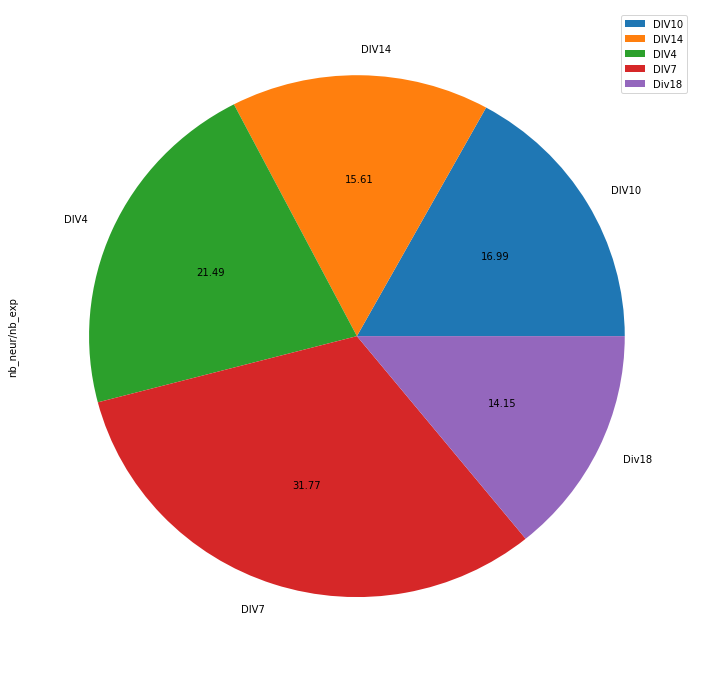

In [15]:
# Summary :
display(wistar_stats)

display(wistar_stats.plot.pie(y='nb_exp', figsize=(12,12), autopct='%.2f'))
display(wistar_stats.plot.pie(y='nb_neur', figsize=(12,12), autopct='%.2f'))
display(wistar_stats.plot.pie(y='nb_neur/nb_exp', figsize=(12,12), autopct='%.2f'))

# Analyse hyper-synchrony

In [2]:

# base_directory = '/Volumes/LaCie/LaCie/Gcampf6/ANALYSED/'
base_directory = '../Data/'

limit = 1.1

gaers_list = []
wistar_list = []

for dirpath, dirnames, filenames in os.walk(base_directory):
    for filename in [f for f in filenames if f.endswith(".tif") and 'objects_map' not in f]:
        file_path = os.path.join(dirpath, filename)
        
        video = neuron.get_signal(file_path)
        nb_events, position_events = neuron.find_events(video, limit=limit)
        print(file_path)
        print("{} évènements à {}".format(nb_events, position_events))
        if 'gaers' in file_path.lower():
            gaers_list.append([os.path.basename(file_path), nb_events, position_events])
        if 'wistar' in file_path.lower():
            wistar_list.append([os.path.basename(file_path), nb_events, position_events])
            
with open("../results/gaers_events.pickle", mode='wb') as file:
    pickle.dump(gaers_list, file)
with open("../results/wistar_events.pickle", mode='wb') as file:
    pickle.dump(wistar_list, file)

../Data/WistarDIV4_3_3.tif
1 évènements à [0]
../Data/WistarDIV4_3_4.tif
1 évènements à [0]
../Data/GAERSDIV4_1_3.tif
0 évènements à []
../Data/small.tif
0 évènements à []


In [3]:
# check re-load file
pickle.load(open("../results/gaers_events.pickle", "rb"))

[['GAERSDIV4_1_3.tif', 0, array([], dtype=float64)]]